# Importing libraries

In [3]:
import numpy as np 
import math
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score ,mean_absolute_percentage_error



C:\Users\X280\OneDrive\Documents\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Loading the data

In [4]:
path = r'C:\Users\X280\Desktop\Python projects\Algorithmic trading'

X_train = pd.read_csv(path + r'\training_input.csv', header=0,sep=';')
y_train= pd.read_csv(path + r'\challenge_34_cfm_trainingoutputfile.csv',index_col='ID',sep=',')
X_test=pd.read_csv(path+r'\testing_input.csv',sep=';')

In [5]:
display(X_train,y_train,X_test)

,ID,date,product_id,volatility 09:30:00,volatility 09:35:00,volatility 09:40:00,volatility 09:45:00,volatility 09:50:00,volatility 09:55:00,volatility 10:00:00,...,return 13:10:00,return 13:15:00,return 13:20:00,return 13:25:00,return 13:30:00,return 13:35:00,return 13:40:00,return 13:45:00,return 13:50:00,return 13:55:00
0,1,1,1,0.662737,0.716896,0.698601,0.480172,0.623665,0.201876,0.327206,...,1.0,1.0,1.0,-1.0,1.0,-1.0,0.0,1.0,1.0,-1.0
1,2,1,2,0.285394,0.379560,0.094858,0.094794,0.055315,0.173994,0.102745,...,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0
2,3,1,3,1.151646,1.093562,1.833443,0.595823,0.310177,0.792310,0.401979,...,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,1.0,1.0
3,4,1,4,0.835260,0.329615,0.340366,0.216692,0.350371,0.247594,0.341194,...,-1.0,1.0,1.0,0.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0
4,5,1,5,0.274185,0.061076,0.010168,0.060890,0.000000,0.213162,0.162763,...,-1.0,1.0,1.0,0.0,1.0,0.0,-1.0,-1.0,-1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636308,636309,2117,314,0.445187,0.440826,0.197667,0.287851,0.377562,0.406626,0.203188,...,1.0,-1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0
636309,636310,2117,315,0.151186,0.160654,0.189244,0.104012,0.132380,0.085103,0.170077,...,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0
636310,636311,2117,316,0.272429,0.215522,0.198277,0.543331,0.098376,0.295860,0.109611,...,1.0,-1.0,-1.0,0.0,-1.0,0.0,1.0,1.0,1.0,-1.0
636311,636312,2117,317,0.483781,0.096898,0.194044,0.135702,0.000000,0.038793,0.000000,...,0.0,0.0,0.0,0.0,NaN,0.0,1.0,NaN,-1.0,0.0


,TARGET
ID,
1,0.134168
2,0.046126
3,0.144312
4,0.130176
5,0.085873
...,...
636309,0.213932
636310,0.165349
636311,0.222322


,ID,date,product_id,volatility 09:30:00,volatility 09:35:00,volatility 09:40:00,volatility 09:45:00,volatility 09:50:00,volatility 09:55:00,volatility 10:00:00,...,return 13:10:00,return 13:15:00,return 13:20:00,return 13:25:00,return 13:30:00,return 13:35:00,return 13:40:00,return 13:45:00,return 13:50:00,return 13:55:00
0,636314,2118,1,1.789785,0.331795,0.116128,0.149308,0.314758,0.248846,0.545911,...,0.0,-1.0,-1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
1,636315,2118,2,0.476156,0.562543,0.437287,0.155260,0.084687,0.113053,0.113087,...,-1.0,-1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,-1.0
2,636316,2118,3,0.311971,1.004342,0.868062,0.189651,0.566655,0.298565,0.235630,...,1.0,-1.0,1.0,0.0,0.0,1.0,-1.0,1.0,1.0,-1.0
3,636317,2118,4,1.791920,0.502895,0.233128,0.197036,0.071677,0.125627,0.089803,...,1.0,0.0,1.0,0.0,-1.0,1.0,0.0,1.0,1.0,0.0
4,636318,2118,5,0.339878,0.395725,0.526572,0.112837,0.018806,0.018806,0.263286,...,1.0,1.0,1.0,1.0,-1.0,0.0,-1.0,-1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635392,1271706,4237,314,0.343785,0.372761,0.192670,0.288345,0.117420,0.128066,0.094830,...,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,0.0,1.0
635393,1271707,4237,315,0.098985,0.074141,0.173224,0.129969,0.000000,0.055738,0.117779,...,-1.0,1.0,1.0,-1.0,-1.0,1.0,0.0,-1.0,-1.0,1.0
635394,1271708,4237,316,0.686502,0.204714,0.073112,0.306496,0.116833,0.102277,0.109446,...,0.0,-1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
635395,1271709,4237,317,0.000000,1.222118,1.126561,0.913602,0.190489,0.000000,0.038025,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Pre-processing

In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636313 entries, 0 to 636312
Columns: 111 entries, ID to return 13:55:00
dtypes: float64(108), int64(3)
memory usage: 538.9 MB


In [7]:
X_train = X_train.drop(X_train.columns[57:], axis=1)
X_test  = X_test.drop(X_test.columns[57:], axis=1)

In [8]:
missing_values = X_train.isnull().sum()
print(missing_values)

ID                         0
date                       0
product_id                 0
volatility 09:30:00    28091
volatility 09:35:00     8755
volatility 09:40:00     5657
volatility 09:45:00     4756
volatility 09:50:00     4536
volatility 09:55:00     4812
volatility 10:00:00     3805
volatility 10:05:00     4460
volatility 10:10:00     4554
volatility 10:15:00     4673
volatility 10:20:00     5025
volatility 10:25:00     5385
volatility 10:30:00     4824
volatility 10:35:00     5352
volatility 10:40:00     5702
volatility 10:45:00     5762
volatility 10:50:00     5955
volatility 10:55:00     6108
volatility 11:00:00     5605
volatility 11:05:00     6108
volatility 11:10:00     6093
volatility 11:15:00     6132
volatility 11:20:00     6559
volatility 11:25:00     6430
volatility 11:30:00     6657
volatility 11:35:00     7324
volatility 11:40:00     7732
volatility 11:45:00     7718
volatility 11:50:00     7891
volatility 11:55:00     8277
volatility 12:00:00     7975
volatility 12:

Since we have a lot of missing values we will use the interpolate method to handle them 

In [9]:
X_train.iloc[:, 3:] = X_train.iloc[:, 3:].interpolate(axis=1)
X_test.iloc[:, 3:] = X_test.iloc[:, 3:].interpolate(axis=1)


In [10]:
missing_values = X_train.isnull().sum()
print(missing_values)

ID                         0
date                       0
product_id                 0
volatility 09:30:00    28091
volatility 09:35:00     4156
volatility 09:40:00     1273
volatility 09:45:00      699
volatility 09:50:00      453
volatility 09:55:00      361
volatility 10:00:00      311
volatility 10:05:00      302
volatility 10:10:00      281
volatility 10:15:00      272
volatility 10:20:00      264
volatility 10:25:00      255
volatility 10:30:00      185
volatility 10:35:00      170
volatility 10:40:00      162
volatility 10:45:00      156
volatility 10:50:00      146
volatility 10:55:00      143
volatility 11:00:00      140
volatility 11:05:00      137
volatility 11:10:00      135
volatility 11:15:00      134
volatility 11:20:00      132
volatility 11:25:00      132
volatility 11:30:00      129
volatility 11:35:00      129
volatility 11:40:00      129
volatility 11:45:00      127
volatility 11:50:00      125
volatility 11:55:00      125
volatility 12:00:00      125
volatility 12:

We notice that we still have missing values in our train data, what we can do is simply replace the NaN values by 0

In [11]:
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)


Since everything is good now with the pre-processing of our dataframe, we can start our models

# Models

In [12]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

Before we use a model, we have to merge the two DF X_train and y_train in only one on='ID' in order to have one data frame where we have all our features and the target for each ID

In [13]:
X_train=X_train.merge(y_train, on='ID')

In [14]:
X_train

,ID,date,product_id,volatility 09:30:00,volatility 09:35:00,volatility 09:40:00,volatility 09:45:00,volatility 09:50:00,volatility 09:55:00,volatility 10:00:00,...,volatility 13:15:00,volatility 13:20:00,volatility 13:25:00,volatility 13:30:00,volatility 13:35:00,volatility 13:40:00,volatility 13:45:00,volatility 13:50:00,volatility 13:55:00,TARGET
0,1,1,1,0.662737,0.716896,0.698601,0.480172,0.623665,0.201876,0.327206,...,0.230885,0.062962,0.274345,0.393201,0.078658,0.041951,0.115287,0.136218,0.052386,0.134168
1,2,1,2,0.285394,0.379560,0.094858,0.094794,0.055315,0.173994,0.102745,...,0.079048,0.071119,0.078995,0.220849,0.142118,0.039484,0.055287,0.059276,0.071155,0.046126
2,3,1,3,1.151646,1.093562,1.833443,0.595823,0.310177,0.792310,0.401979,...,0.275287,0.249349,0.262916,0.341119,0.170464,0.275906,0.196799,0.111488,0.117980,0.144312
3,4,1,4,0.835260,0.329615,0.340366,0.216692,0.350371,0.247594,0.341194,...,0.217509,0.103530,0.031052,0.217124,0.186312,0.051811,0.093239,0.082934,0.155294,0.130176
4,5,1,5,0.274185,0.061076,0.010168,0.060890,0.000000,0.213162,0.162763,...,0.275442,0.081595,0.020390,0.162940,0.040744,0.122338,0.050963,0.112193,0.000000,0.085873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636308,636309,2117,314,0.445187,0.440826,0.197667,0.287851,0.377562,0.406626,0.203188,...,0.302585,0.313269,0.128620,0.267998,0.401197,0.240198,0.307821,0.324072,0.279878,0.213932
636309,636310,2117,315,0.151186,0.160654,0.189244,0.104012,0.132380,0.085103,0.170077,...,0.047353,0.094800,0.066344,0.037914,0.066382,0.075896,0.047439,0.198986,0.075806,0.165349
636310,636311,2117,316,0.272429,0.215522,0.198277,0.543331,0.098376,0.295860,0.109611,...,0.153764,0.079369,0.033632,0.098935,0.044868,0.109629,0.167986,0.152494,0.033582,0.222322
636311,636312,2117,317,0.483781,0.096898,0.194044,0.135702,0.000000,0.038793,0.000000,...,0.000000,0.000000,0.006484,0.003242,0.000000,0.019436,0.019438,0.019439,0.000000,0.146314


In [15]:
 X_train.drop(['ID','date','product_id'],axis=1,inplace=True)

In [16]:
X_train

,volatility 09:30:00,volatility 09:35:00,volatility 09:40:00,volatility 09:45:00,volatility 09:50:00,volatility 09:55:00,volatility 10:00:00,volatility 10:05:00,volatility 10:10:00,volatility 10:15:00,...,volatility 13:15:00,volatility 13:20:00,volatility 13:25:00,volatility 13:30:00,volatility 13:35:00,volatility 13:40:00,volatility 13:45:00,volatility 13:50:00,volatility 13:55:00,TARGET
0,0.662737,0.716896,0.698601,0.480172,0.623665,0.201876,0.327206,0.374239,0.207611,0.213038,...,0.230885,0.062962,0.274345,0.393201,0.078658,0.041951,0.115287,0.136218,0.052386,0.134168
1,0.285394,0.379560,0.094858,0.094794,0.055315,0.173994,0.102745,0.079102,0.047445,0.071119,...,0.079048,0.071119,0.078995,0.220849,0.142118,0.039484,0.055287,0.059276,0.071155,0.046126
2,1.151646,1.093562,1.833443,0.595823,0.310177,0.792310,0.401979,0.336490,0.619155,0.504735,...,0.275287,0.249349,0.262916,0.341119,0.170464,0.275906,0.196799,0.111488,0.117980,0.144312
3,0.835260,0.329615,0.340366,0.216692,0.350371,0.247594,0.341194,0.175573,0.278420,0.113430,...,0.217509,0.103530,0.031052,0.217124,0.186312,0.051811,0.093239,0.082934,0.155294,0.130176
4,0.274185,0.061076,0.010168,0.060890,0.000000,0.213162,0.162763,0.203675,0.456380,0.303923,...,0.275442,0.081595,0.020390,0.162940,0.040744,0.122338,0.050963,0.112193,0.000000,0.085873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636308,0.445187,0.440826,0.197667,0.287851,0.377562,0.406626,0.203188,0.475084,0.366692,0.191625,...,0.302585,0.313269,0.128620,0.267998,0.401197,0.240198,0.307821,0.324072,0.279878,0.213932
636309,0.151186,0.160654,0.189244,0.104012,0.132380,0.085103,0.170077,0.132441,0.132496,0.085197,...,0.047353,0.094800,0.066344,0.037914,0.066382,0.075896,0.047439,0.198986,0.075806,0.165349
636310,0.272429,0.215522,0.198277,0.543331,0.098376,0.295860,0.109611,0.125018,0.559236,0.102018,...,0.153764,0.079369,0.033632,0.098935,0.044868,0.109629,0.167986,0.152494,0.033582,0.222322
636311,0.483781,0.096898,0.194044,0.135702,0.000000,0.038793,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.006484,0.003242,0.000000,0.019436,0.019438,0.019439,0.000000,0.146314


In [17]:
train_X,test_X,train_y,test_y= train_test_split(X_train.iloc[:,:-1],X_train['TARGET'],test_size=0.2,random_state=42)

## Linear regression , Random Forest and XGBoost

In [18]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

results = {}

In [19]:
for model_name, model in models.items():
  
    model.fit(train_X, train_y)
    
   
    train_pred = model.predict(train_X)
    test_pred = model.predict(test_X)
    

    train_mape = mean_absolute_percentage_error(train_y, train_pred)
    test_mape = mean_absolute_percentage_error(test_y, test_pred)
    train_mae = mean_absolute_error(train_y, train_pred)
    test_mae = mean_absolute_error(test_y, test_pred)
    train_mse = mean_squared_error(train_y, train_pred)
    test_mse = mean_squared_error(test_y, test_pred)
    train_r2 = r2_score(train_y, train_pred)
    test_r2 = r2_score(test_y, test_pred)
    

    results[model_name] = {
        "Train MAPE": train_mape,
        "Test MAPE": test_mape,
        "Train MAE": train_mae,
        "Test MAE": test_mae,
        "Train MSE": train_mse,
        "Test MSE": test_mse,
        "Train R²": train_r2,
        "Test R²": test_r2
    }

In [20]:
results_df = pd.DataFrame(results).T
print(results_df)

                   Train MAPE  Test MAPE  Train MAE  Test MAE  Train MSE  \
Linear Regression   26.230732  26.504134   0.044234  0.044421   0.005678   
Random Forest       10.239090  28.136403   0.016356  0.044022   0.000783   
XGBoost             26.194175  27.769316   0.041282  0.045153   0.004144   

                   Test MSE  Train R²   Test R²  
Linear Regression  0.005878  0.762849  0.766982  
Random Forest      0.005649  0.967301  0.776077  
XGBoost            0.006044  0.826929  0.760393  


- Random forest : overfit because of the high value of the test MAPE in comparision with the train MAPE, the same also for R^2.
- Linear regression : the values of all metrics are reasonable but can be improved.
- XGBoost : better than linear regression but high for the test for MAPE and others metrics are good but can be improved.

# Optimisation Random forest

In [20]:
from sklearn.ensemble import RandomForestRegressor


param_grid = {
    'n_estimators': [300, 500],
    'max_depth': [10, 20],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 4],
    'max_features': [ 'sqrt']
}


rf = RandomForestRegressor(random_state=42)

rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=10, cv=3, random_state=42, n_jobs=-1)
rf_random.fit(train_X, train_y)


print("The best hyperpara Random Forest:", rf_random.best_params_)


The best hyperpara Random Forest: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}


In [22]:
rf_optimized = RandomForestRegressor(
    n_estimators=500,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    max_depth=20,
    random_state=42
)


rf_optimized.fit(train_X, train_y)


train_pred = rf_optimized.predict(train_X)
test_pred = rf_optimized.predict(test_X)

train_mape = mean_absolute_percentage_error(train_y, train_pred)
test_mape = mean_absolute_percentage_error(test_y, test_pred)
train_mae = mean_absolute_error(train_y, train_pred)
test_mae = mean_absolute_error(test_y, test_pred)
train_mse = mean_squared_error(train_y, train_pred)
test_mse = mean_squared_error(test_y, test_pred)
train_r2 = r2_score(train_y, train_pred)
test_r2 = r2_score(test_y, test_pred)


model_evaluation = {
    "Train MAPE": train_mape,
    "Test MAPE": test_mape,
    "Train MAE": train_mae,
    "Test MAE": test_mae,
    "Train MSE": train_mse,
    "Test MSE": test_mse,
    "Train R²": train_r2,
    "Test R²": test_r2
}

print(model_evaluation)


{'Train MAPE': 19.842773768859487, 'Test MAPE': 28.216605289434792, 'Train MAE': 0.026489117084509947, 'Test MAE': 0.04365368829228412, 'Train MSE': 0.001391781852900715, 'Test MSE': 0.005586129876056966, 'Train R²': 0.9418707777904677, 'Test R²': 0.778550906110294}


In [29]:
initial_model_evaluation_rf = {
    "Train MAPE": results_df.loc["Random Forest", "Train MAPE"],
    "Test MAPE": results_df.loc["Random Forest", "Test MAPE"],
    "Train MAE": results_df.loc["Random Forest", "Train MAE"],
    "Test MAE": results_df.loc["Random Forest", "Test MAE"],
    "Train MSE": results_df.loc["Random Forest", "Train MSE"],
    "Test MSE": results_df.loc["Random Forest", "Test MSE"],
    "Train R²": results_df.loc["Random Forest", "Train R²"],
    "Test R²": results_df.loc["Random Forest", "Test R²"]
}


comparison_rf_df = pd.DataFrame({
    "Metric": list(model_evaluation.keys()),
    "Before Optimization": list(initial_model_evaluation_rf.values()),
    "After Optimization": list(model_evaluation.values())
})






In [30]:
comparison_rf_df

,Metric,Before Optimization,After Optimization
0,Train MAPE,10.239090,19.842774
1,Test MAPE,28.136403,28.216605
2,Train MAE,0.016356,0.026489
3,Test MAE,0.044022,0.043654
4,Train MSE,0.000783,0.001392
5,Test MSE,0.005649,0.005586
6,Train R²,0.967301,0.941871
7,Test R²,0.776077,0.778551


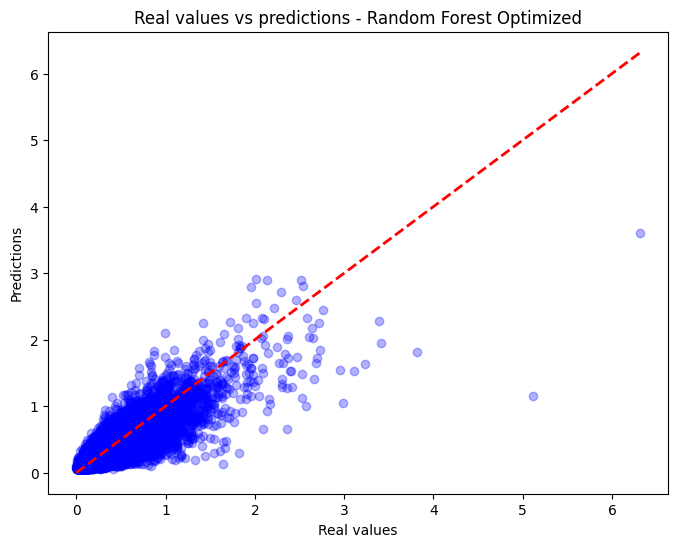

In [22]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
plt.scatter(test_y, test_pred, alpha=0.3, color='blue')
plt.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'r--', linewidth=2)
plt.xlabel('Real values')
plt.ylabel('Predictions')
plt.title('Real values vs predictions - Random Forest Optimized')
plt.show()
